# Overview 
This notebook uses the final results and the results from Wes Gohn's publication to compare kaon to pion BSAs.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [52]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [2]:
kaon_df = pd.read_csv('results/fit/sys.csv')
pion_df = pd.read_csv('results/wes/pip.csv')

In [3]:
kaon_df.head() 

,axis,axis_bin,axis_max,axis_min,err_0,err_1,err_2,par_0,par_1,par_2,...,sys_4_par2,sys_3_par0,sys_3_par1,sys_3_par2,sys_10_par0,sys_10_par1,sys_10_par2,sys_11_par0,sys_11_par1,sys_11_par2
0,pt,0,0.202108,0.000284,0.005593,0.399494,0.481435,0.023548,0.035530,-0.284411,...,0.063736,0.000101,0.133262,0.118209,0.000829,0.081397,0.084052,0.000964,0.026559,0.005895
1,pt,1,0.274544,0.202108,0.006052,0.395408,0.481255,0.025324,-0.422032,0.095175,...,0.051845,0.001937,0.007376,0.167376,0.001490,0.037992,0.100629,0.001149,0.041276,0.014100
2,pt,2,0.328453,0.274544,0.006538,0.372410,0.388941,0.030275,0.148326,-0.380049,...,0.013489,0.001548,0.091878,0.010678,0.001053,0.109994,0.005716,0.000358,0.011726,0.054564
3,pt,3,0.376169,0.328453,0.004896,0.414820,0.458937,0.033449,-0.043825,-0.252222,...,0.013920,0.000245,0.025403,0.004015,0.001226,0.081653,0.017168,0.001758,0.051939,0.041590
4,pt,4,0.422123,0.376169,0.007735,0.363314,0.472040,0.034751,0.058782,-0.293545,...,0.059868,0.002776,0.102866,0.006474,0.000703,0.040874,0.013394,0.001885,0.027241,0.059010


In [4]:
pion_df.head()

,axis,axis_bin,axis_value,value,stat,sys
0,z,0,0.05,0.0059,0.0004,0.0004
1,z,1,0.15,0.0071,0.0009,0.0002
2,z,2,0.25,0.0070,0.0010,0.0010
3,z,3,0.35,0.0110,0.0010,0.0010
4,z,4,0.45,0.0150,0.0010,0.0010


In [5]:
print(kaon_df.columns)

Index([u'axis', u'axis_bin', u'axis_max', u'axis_min', u'err_0', u'err_1',
       u'err_2', u'par_0', u'par_1', u'par_2', u'sys_total_0', u'sys_total_1',
       u'sys_total_2', u'sys_1_par0', u'sys_1_par1', u'sys_1_par2',
       u'sys_2_par0', u'sys_2_par1', u'sys_2_par2', u'sys_9_par0',
       u'sys_9_par1', u'sys_9_par2', u'sys_5_par0', u'sys_5_par1',
       u'sys_5_par2', u'sys_6_par0', u'sys_6_par1', u'sys_6_par2',
       u'sys_8_par0', u'sys_8_par1', u'sys_8_par2', u'sys_7_par0',
       u'sys_7_par1', u'sys_7_par2', u'sys_4_par0', u'sys_4_par1',
       u'sys_4_par2', u'sys_3_par0', u'sys_3_par1', u'sys_3_par2',
       u'sys_10_par0', u'sys_10_par1', u'sys_10_par2', u'sys_11_par0',
       u'sys_11_par1', u'sys_11_par2'],
      dtype='object')


In [6]:
print(pion_df.columns)

Index([u'axis', u'axis_bin', u'axis_value', u'value', u'stat', u'sys'], dtype='object')


Since the kaon dataframe doesn't have the `axis_value` column, i'll quickly add it for plotting.

In [7]:
kaon_df['axis_value'] = kaon_df.axis_min + 0.5 * (kaon_df.axis_max-kaon_df.axis_min)

Some of the names in the `kaon_df` are confusing.  I will rename the important columns and drop the rest.

In [8]:
kaon_df.rename(columns={'par_0':'value', 
                        'err_0':'stat', 
                        'sys_total_0':'sys'
                       }, inplace=True)

keep_cols = pion_df.columns
drop_cols = [col for col in kaon_df.columns if col not in keep_cols]
kaon_df.drop(columns=drop_cols, inplace=True)

In [9]:
kaon_df.head()

,axis,axis_bin,stat,value,sys,axis_value
0,pt,0,0.005593,0.023548,0.003065,0.101196
1,pt,1,0.006052,0.025324,0.004455,0.238326
2,pt,2,0.006538,0.030275,0.005614,0.301499
3,pt,3,0.004896,0.033449,0.003912,0.352311
4,pt,4,0.007735,0.034751,0.005095,0.399146


In [10]:
pion_axes = pion_df.axis.unique()
kaon_axes = kaon_df.axis.unique()

In [11]:
for axis in pion_axes:
    assert(axis in kaon_axes)
    
for axis in kaon_axes:
    assert(axis in pion_axes)

The datasets have the same axes.

In [12]:
axes = pion_axes 

In [105]:
add_quad = lambda x1, x2: np.sqrt(x1**2 + x2**2)

def plot_compare(pion_df, kaon_df, axis_name, ax):
    
    xlims = {
        'x' :[0.0, 0.7],
        'q2':[0.5, 5.0],
        'z' :[0.0, 1.1],
        'pt':[0.0, 1.0]
    }
    
    tex_labels = {
        'x': '$x$',
        'q2':'$Q^2 \; [GeV^2/c^2]$',
        'z': '$z_h$',
        'pt':'$P_T \; [GeV/c]$'
    }
    
    ax.errorbar(pion_df[pion_df.axis == axis_name].axis_value, 
                    pion_df[pion_df.axis == axis_name].value,
                    add_quad(pion_df[pion_df.axis == axis_name].stat, pion_df[pion_df.axis == axis_name].sys),
                   linestyle='', marker='o', label='E1-F $\pi^+$ (Gohn 2014)',
               color='black')
    ax.errorbar(kaon_df[kaon_df.axis == axis_name].axis_value, 
                    kaon_df[kaon_df.axis == axis_name].value,
                    add_quad(kaon_df[kaon_df.axis == axis_name].stat, kaon_df[kaon_df.axis == axis_name].sys), 
                   linestyle='', marker='v', label='E1-F $K^+$',
               color='red')
    ax.set_ylim([-0.01, 0.08])
    ax.set_xlim(xlims[axis_name])
    ax.set_xlabel(tex_labels[axis_name])
    ax.legend(frameon=False)

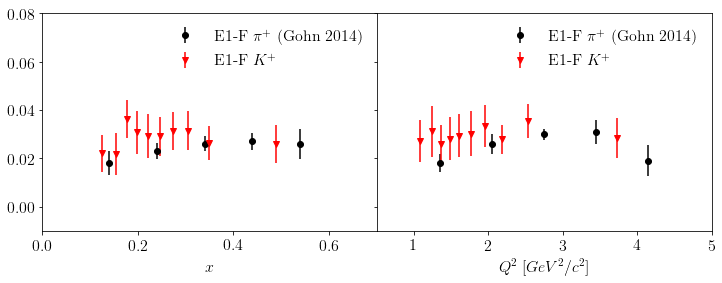

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'x', axs[0])
plot_compare(pion_df, kaon_df, 'q2', axs[1])

fig.savefig('image/compare-pion-xq2.pdf', bbox_inches='tight')

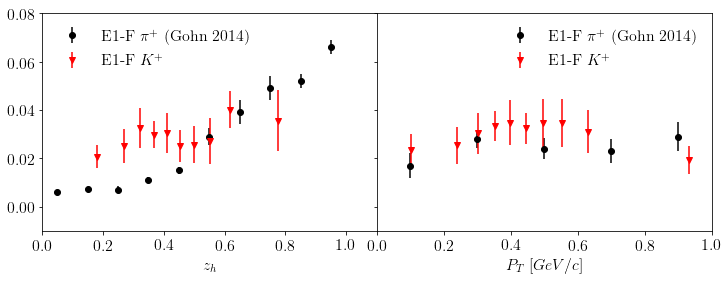

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'z', axs[0])
plot_compare(pion_df, kaon_df, 'pt', axs[1])

fig.savefig('image/compare-pion-zpt.pdf', bbox_inches='tight')